In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Vedant Kadu\OneDrive\Desktop\project_02\artifact\raw\data.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
df.drop(columns="Id", axis=0, inplace=True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Anlysis

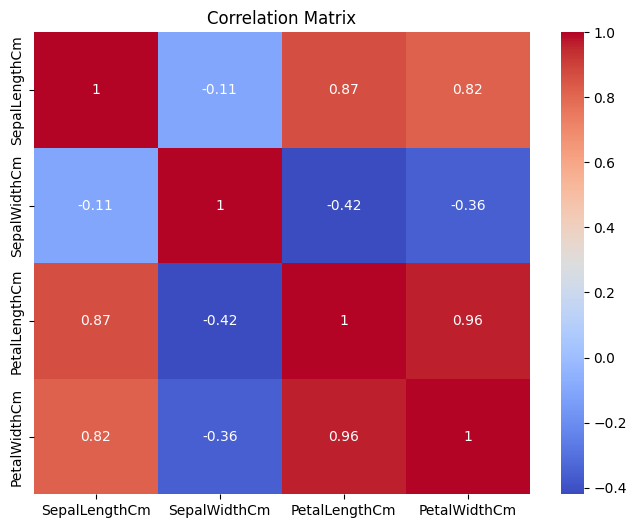

In [13]:
#for correlation nigga
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns='Species').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

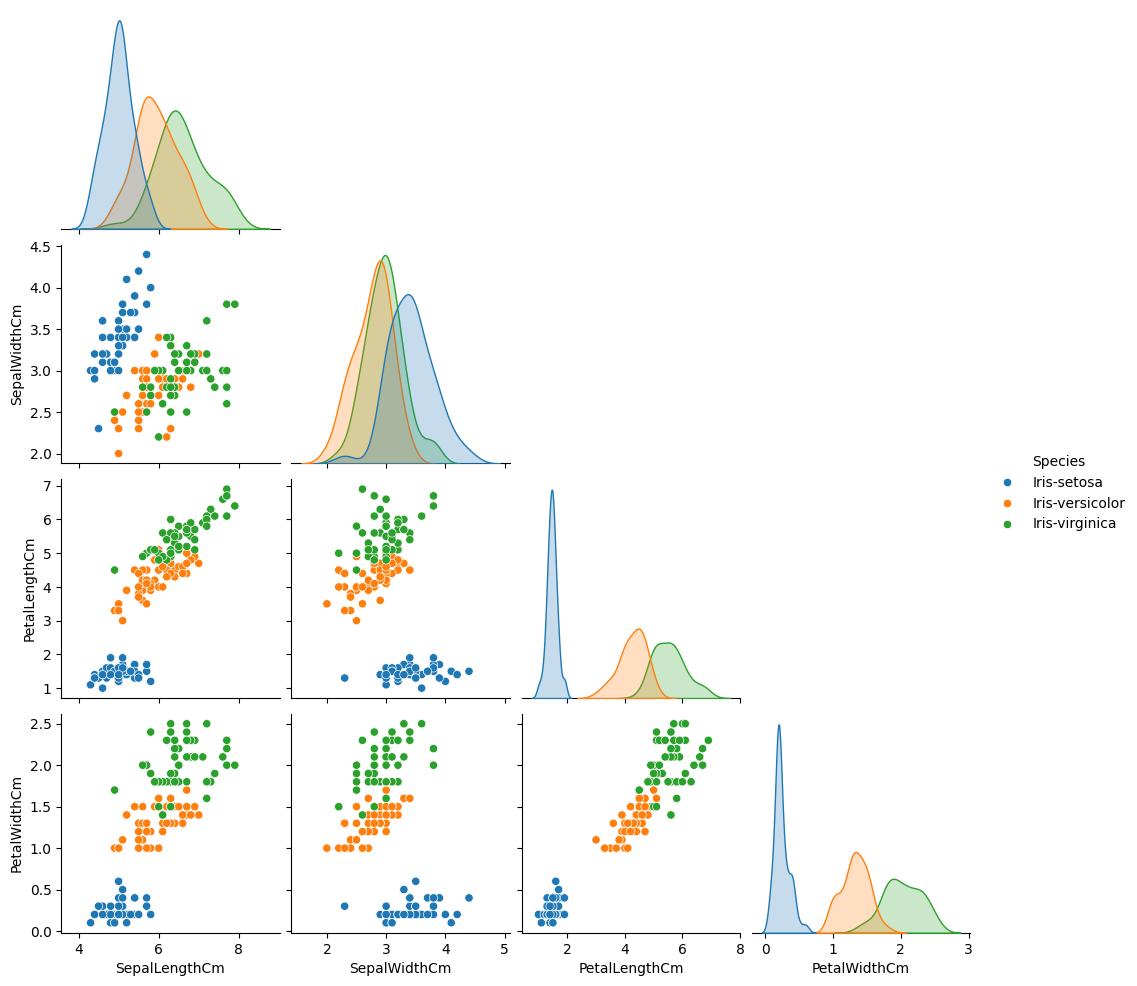

In [14]:
#for pairplot nigga
sns.pairplot(df, hue='Species', corner=True)

In [ ]:
#distribution plot 
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20, hue='Species', palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.show()


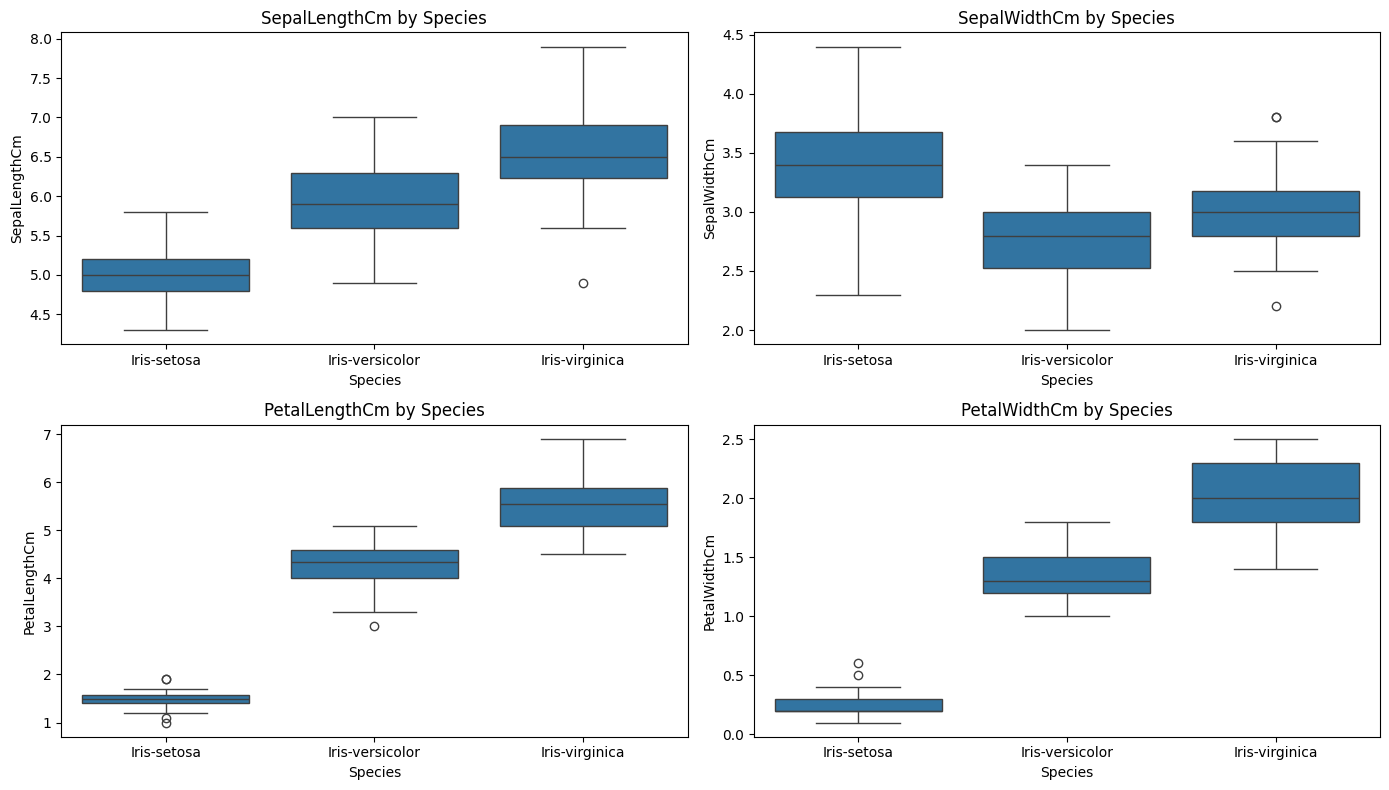

In [ ]:
#boxplot k liye hai. toh nigga observe kr aur outlier dhoond SepalWidthCm isme dhik rha 
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=feature, data=df)
    plt.title(f'{feature} by Species')
plt.tight_layout()
plt.show()


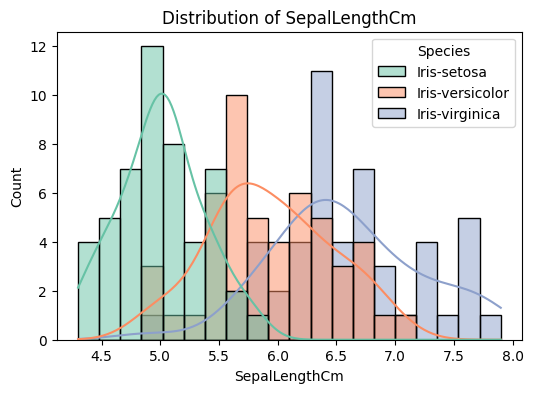

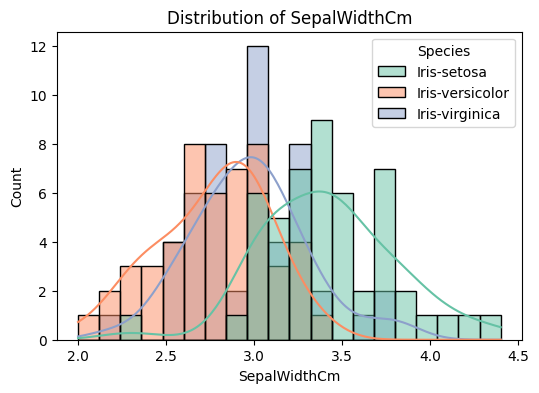

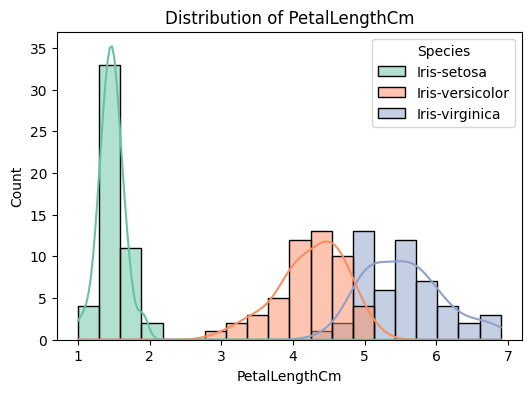

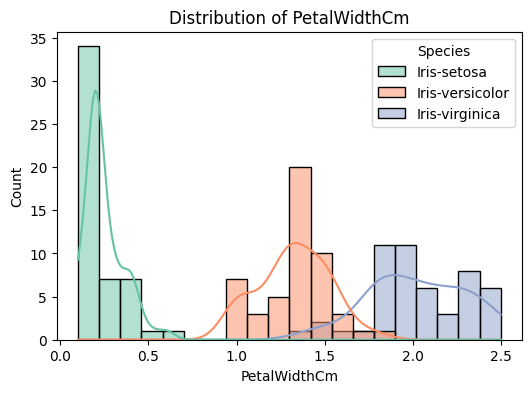

In [16]:
#distribution plot 
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=20, hue='Species', palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [17]:
#nigga abhi outlier detect krte hai 
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} → {len(outliers)} outliers")


SepalLengthCm → 0 outliers
SepalWidthCm → 4 outliers
PetalLengthCm → 0 outliers
PetalWidthCm → 0 outliers


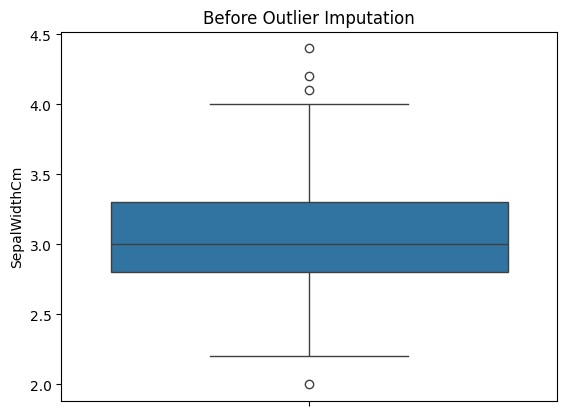

In [18]:
#before
sns.boxplot(df["SepalWidthCm"])
plt.title("Before Outlier Imputation")
plt.show()

In [19]:
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)

IQR = Q3-Q1

Lower_value = Q1 - 1.5*IQR
Upper_value = Q3 + 1.5*IQR

sepal_median = np.median(df["SepalWidthCm"])

In [20]:
sepal_median

np.float64(3.0)

In [21]:
for i in df["SepalWidthCm"]:
    if i> Upper_value or i<Lower_value:
        df["SepalWidthCm"] = df["SepalWidthCm"].replace(i,sepal_median)

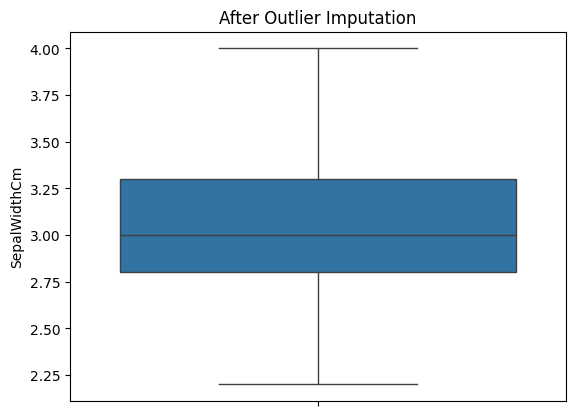

In [22]:
sns.boxplot(df["SepalWidthCm"])
plt.title("After Outlier Imputation")
plt.show()

## Model Training using the Decision tree

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df["Species"]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [27]:
tree_clf = DecisionTreeClassifier(criterion="gini" , max_depth=30 , random_state=42)

In [28]:
tree_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
y_pred = tree_clf.predict(X_test)

In [31]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [32]:
accuracy = accuracy_score(y_test , y_pred)

In [33]:
accuracy

1.0

In [34]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [35]:
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

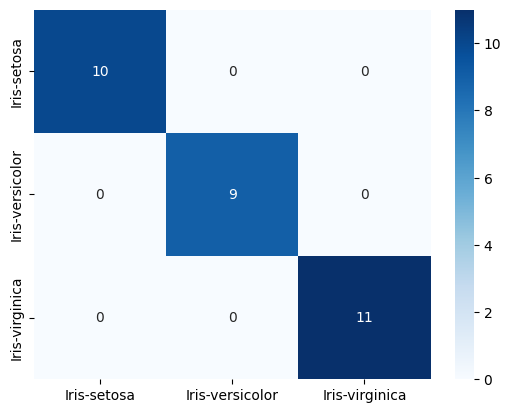

In [36]:
sns.heatmap(conf_matrix,annot=True , cmap="Blues" , xticklabels=tree_clf.classes_ , yticklabels=tree_clf.classes_)
plt.show()

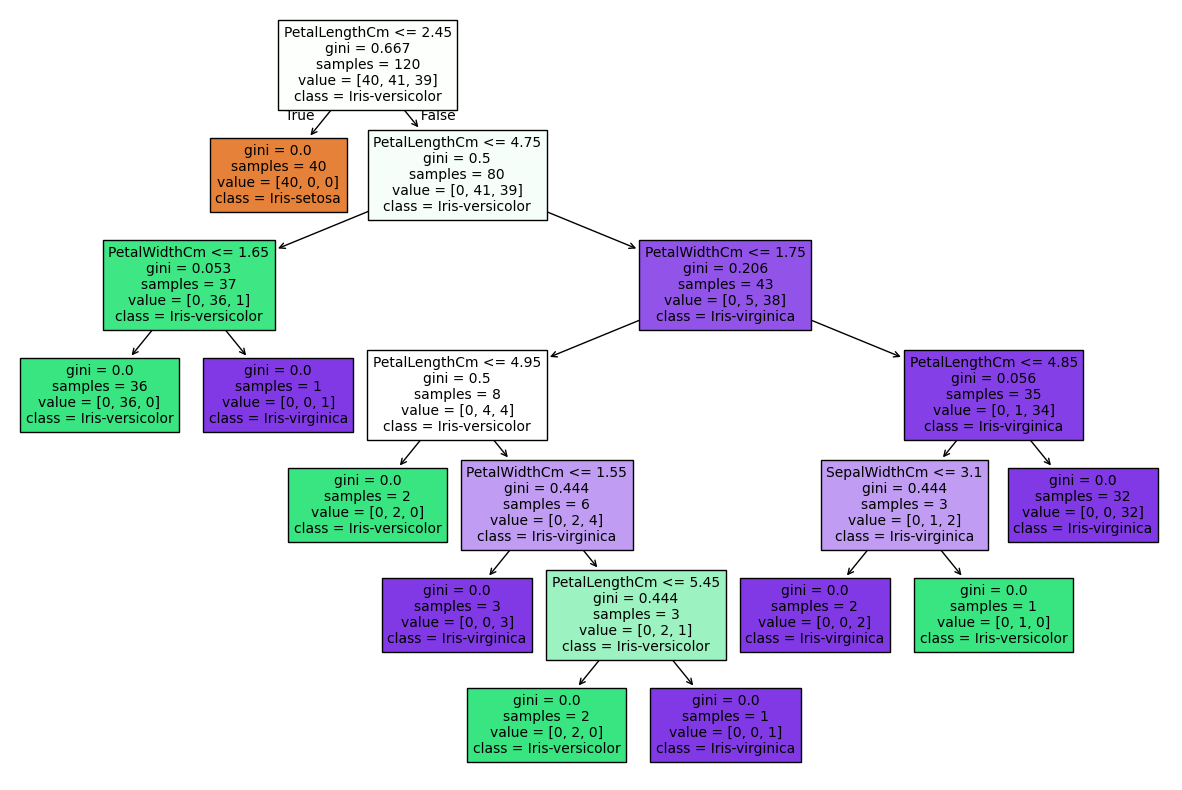

In [38]:
plt.figure(figsize=(15,10))
plot_tree(tree_clf , filled=True , feature_names=X.columns , class_names=tree_clf.classes_)
plt.show()

In [39]:
tree_clf.feature_importances_

array([0.        , 0.01667014, 0.90614339, 0.07718647])

abhi nigga sun meri baat in the above output there is the space ahh and the space there is beacuse the importance of the SepalLengthCm this feature is no to none that is 0 shunya that is why there is space over there dayum shyt!!

In [40]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')